# EO-Forge Loaders 1.0.1 - Logging

## EO-Forge Loaders

__NOTE__: EO-Forge Loaders are meant to be used on a "local" arxiving scheme (your laptop storage, a NFS storage,etc) not (__yet__) on Cloud Buckets, but more on this latter!

We will cover the basics steps to load an scene (and crop some roi-_region of interest_- on it) of:

-  Landsat 5 (historic arxiving - decomissioned)
-  Landsat 8 (on-duty)
-  Sentinel 2 (on-duty)

__NEW__: Logging instance show

### Images

We assume that you have already downloaded some images (we cover the download steps from GCP in other [notebook](./eo-forge-gcp-downloader.ipynb)):

- Landsat 5/8 - Path/Row : 230/094
- Sentinel2 - Tile: 19FCF

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#
import rasterio as rio
import geopandas as gpd
#
from earthpy import plot

In [2]:
from eo_forge.io.LandsatLoaders import LandsatLoader
from eo_forge.io.SentinelLoaders import Sentinel2Loader

In [3]:
# Base dir 
TMP_PROD='./products-int/'
# IMAGES RAW Search Path
IMAGES_RAW=os.path.join(TMP_PROD,'images-raw')
#
# IMAGES CROP Path (to leave cropped files - if appy)
PROD_INT_DIR=os.path.join(TMP_PROD,'images-crop')
os.makedirs(PROD_INT_DIR,exist_ok=True)

## Logging instance

We add some demo regarding using a logging instance with the Loaders.

In [4]:
import logging
from eo_forge.utils.logger import basic_logger

In [5]:
logger_cfg = basic_logger("eo_forge_test")
logger_cfg.set_handler(logging.StreamHandler())
logger_cfg.add_handlers()
logger = logger_cfg.logger_

## Landsat 5 Image

### No bbox

We will query and calibrate the whole image and we will return it as a file (not in memory).

__NOTE__: Image Raw _LT05_L1TP_230094_20111011_20161005_01_T1_ or with the same path/row should exist on IMAGES_RAW dir.

In [6]:
# Init Loader and query bands
LANDSAT5_BANDS=["B1","B2","B3","B4","B5"]
lp=LandsatLoader(IMAGES_RAW,bands=LANDSAT5_BANDS,spacecraft=5,logger=logger) # Notice logger adding

2021-11-23 10:08:12,055 - eo_forge_test - INFO - Running on Landsat 5 data


That is, we have instantiated the Loader with:
- folder: IMAGE_RAW, the place where we look for products (see later)
- bands: list of bands that we require to be processed
- spacecraft: 5 or 8 (stands for Landsat 5 or 8)
- resolution: leave default @ 30 meters
- reflectance: leave default as True so calculate reflectance @ TOA (otherwise calculate radiance)

And now call the processor for the requested product-id:

In [7]:
product_id= "LT05_L1TP_230094_20111011_20161005_01_T1"
res_=lp.execute(product_id,
               bbox=None,
               folder_proc_=PROD_INT_DIR,
               raster_return_open=False,
               write_file='_complete')

2021-11-23 10:08:13,372 - eo_forge_test - INFO - Processing on ./products-int/images-raw/LT05_L1TP_230094_20111011_20161005_01_T1 dir
2021-11-23 10:08:13,380 - eo_forge_test - INFO - Using clipping flag: False
2021-11-23 10:08:13,381 - eo_forge_test - INFO - PROCESSING band: B1
2021-11-23 10:08:13,575 - eo_forge_test - INFO - resample: False - scale factor 1 - true pixel 30.0
2021-11-23 10:08:13,576 - eo_forge_test - INFO - no bbox - full match: True - area: 1
2021-11-23 10:08:14,451 - eo_forge_test - INFO - calibrating band B1
2021-11-23 10:08:16,740 - eo_forge_test - INFO - reprojecting band B1
2021-11-23 10:08:25,915 - eo_forge_test - INFO - PROCESSING band: B2
2021-11-23 10:08:25,919 - eo_forge_test - INFO - resample: False - scale factor 1 - true pixel 30.0
2021-11-23 10:08:25,919 - eo_forge_test - INFO - no bbox - full match: True - area: 1
2021-11-23 10:08:26,953 - eo_forge_test - INFO - calibrating band B2
2021-11-23 10:08:29,082 - eo_forge_test - INFO - reprojecting band B2
20

In [8]:
#check res_
res_

{'raster': None,
 'raster_cloud': None,
 'match': 'TOTAL',
 'raster_path': './products-int/images-crop/LT05_L1TP_230094_20111011_20161005_01_T1_complete.TIF',
 'raster_cloud_path': './products-int/images-crop/LT05_L1TP_230094_20111011_20161005_01_T1_CLOUDS_complete.TIF'}

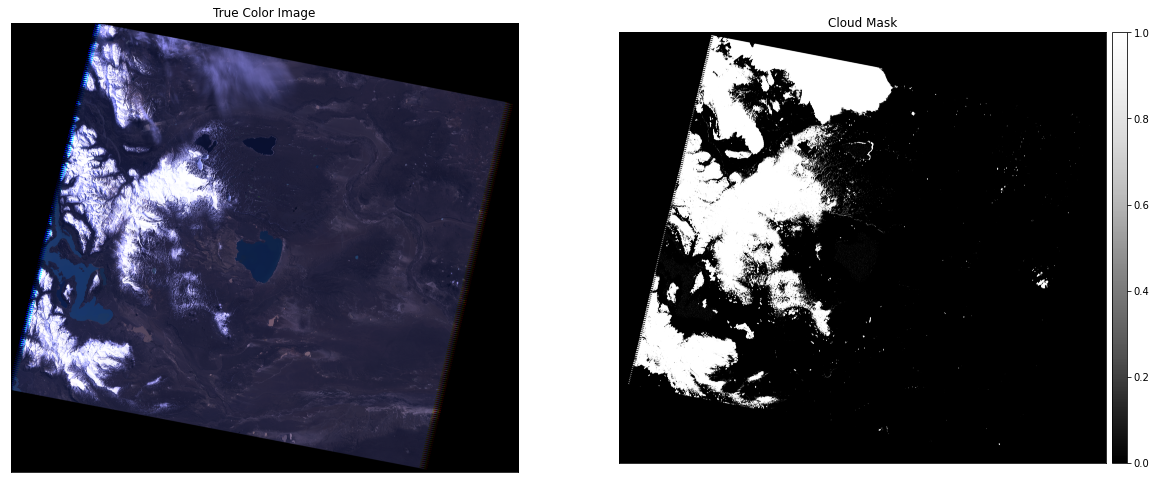

In [9]:
f, ax= plt.subplots(1,2,figsize=(20,20))
raster=rio.open(res_['raster_path'])
plot.plot_rgb(raster.read(),rgb=(2,1,0),ax=ax[0],stretch=True)
ax[0].set_title('True Color Image')
raster.close()

raster=rio.open(res_['raster_cloud_path'])
plot.plot_bands(raster.read(),ax=ax[1])
ax[1].set_title('Cloud Mask')
raster.close()

In [10]:
bbox=gpd.read_file('./data/cardiel-lake.geojson')
#
# now use bbox
# and do not write anything
product_id= "LT05_L1TP_230094_20111011_20161005_01_T1"

res_bbox=lp.execute(product_id,
               bbox=bbox,
               folder_proc_=PROD_INT_DIR,
               raster_return_open=True,
               write_file=None)

2021-11-23 10:10:17,564 - eo_forge_test - INFO - Processing on ./products-int/images-raw/LT05_L1TP_230094_20111011_20161005_01_T1 dir
2021-11-23 10:10:17,569 - eo_forge_test - INFO - Using clipping flag: True
2021-11-23 10:10:17,570 - eo_forge_test - INFO - PROCESSING band: B1
2021-11-23 10:10:17,579 - eo_forge_test - INFO - resample: False - scale factor 1 - true pixel 30.0
2021-11-23 10:10:17,702 - eo_forge_test - INFO - checking  ROI
2021-11-23 10:10:17,726 - eo_forge_test - INFO - checking roi match - full match: True - area: 1
2021-11-23 10:10:17,728 - eo_forge_test - INFO - clipping with Tight BBox
2021-11-23 10:10:17,830 - eo_forge_test - INFO - calibrating band B1
2021-11-23 10:10:17,883 - eo_forge_test - INFO - reprojecting band B1
2021-11-23 10:10:18,091 - eo_forge_test - INFO - PROCESSING band: B2
2021-11-23 10:10:18,093 - eo_forge_test - INFO - resample: False - scale factor 1 - true pixel 30.0
2021-11-23 10:10:18,103 - eo_forge_test - INFO - checking  ROI
2021-11-23 10:10:

Text(0.5, 1.0, 'Cloud Mask')

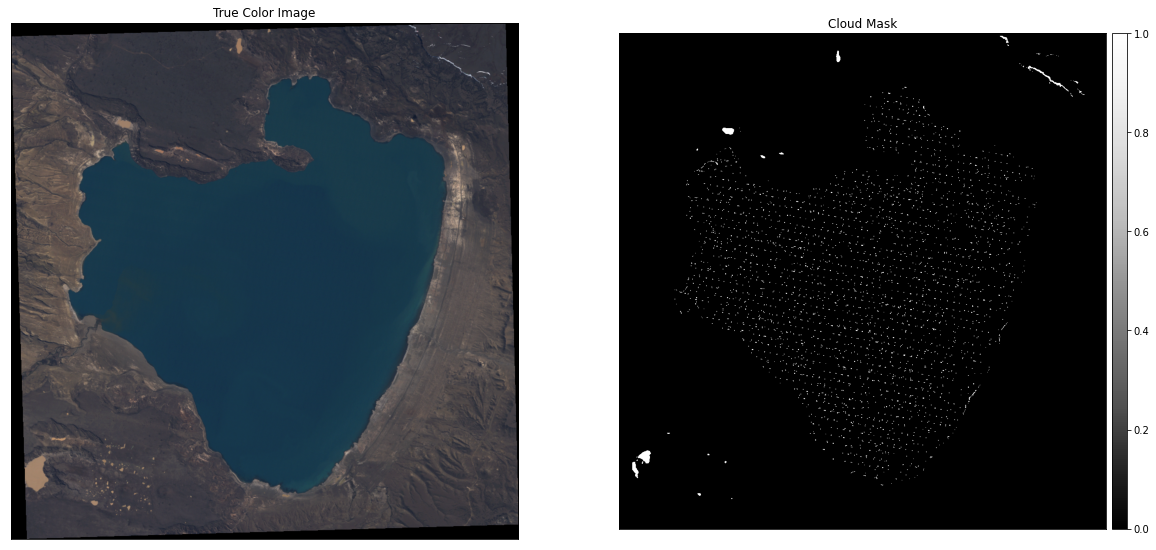

In [11]:
f, ax= plt.subplots(1,2,figsize=(20,20))
raster=res_bbox['raster']
plot.plot_rgb(raster.read(),rgb=(2,1,0),ax=ax[0])
ax[0].set_title('True Color Image')

raster=res_bbox['raster_cloud']
plot.plot_bands(raster.read(),ax=ax[1])
ax[1].set_title('Cloud Mask')

## Partial Match

In [12]:
bbox=gpd.read_file('./data/cardiel-lake-partial-L8.geojson')
#
# now use bbox
# and do not write anything
product_id= "LT05_L1TP_230094_20111011_20161005_01_T1"

res_bbox=lp.execute(product_id,
               bbox=bbox,
               folder_proc_=PROD_INT_DIR,
               raster_return_open=True,
               write_file=None)

2021-11-23 10:11:05,534 - eo_forge_test - INFO - Processing on ./products-int/images-raw/LT05_L1TP_230094_20111011_20161005_01_T1 dir
2021-11-23 10:11:05,541 - eo_forge_test - INFO - Using clipping flag: True
2021-11-23 10:11:05,543 - eo_forge_test - INFO - PROCESSING band: B1
2021-11-23 10:11:05,553 - eo_forge_test - INFO - resample: False - scale factor 1 - true pixel 30.0
2021-11-23 10:11:05,572 - eo_forge_test - INFO - checking  ROI
2021-11-23 10:11:05,683 - eo_forge_test - INFO - checking roi match - full match: False - area: 0.8578756440200377
2021-11-23 10:11:05,685 - eo_forge_test - INFO - clipping with Tight BBox
2021-11-23 10:11:06,243 - eo_forge_test - INFO - reprojecting raster to BBox - Not Full Match Case
2021-11-23 10:11:06,663 - eo_forge_test - INFO - calibrating band B1
2021-11-23 10:11:07,080 - eo_forge_test - INFO - reprojecting band B1
2021-11-23 10:11:08,671 - eo_forge_test - INFO - PROCESSING band: B2
2021-11-23 10:11:08,673 - eo_forge_test - INFO - resample: Fals

Text(0.5, 1.0, 'Cloud Mask')

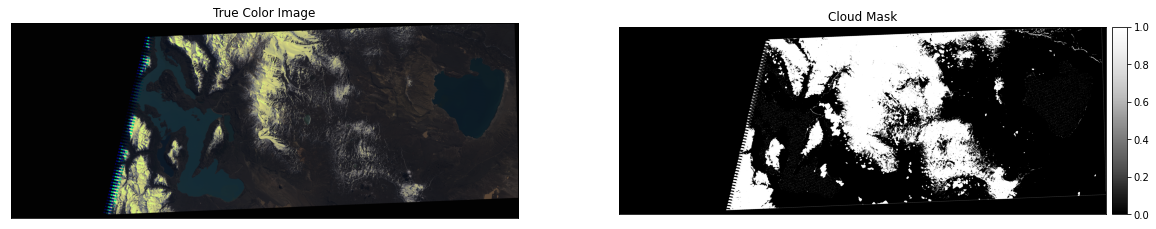

In [13]:
f, ax= plt.subplots(1,2,figsize=(20,20))
raster=res_bbox['raster']
plot.plot_rgb(raster.read(),rgb=(2,1,0),ax=ax[0])
ax[0].set_title('True Color Image')

raster=res_bbox['raster_cloud']
plot.plot_bands(raster.read(),ax=ax[1])
ax[1].set_title('Cloud Mask')

## Landsat 8 Image

### No bbox

We will query and calibrate the whole image and we will return it as a file (not in memory).

__NOTE__: Image Raw _LC08_L1TP_230094_20210904_20210904_01_RT_ or with the same path/row should exist on IMAGES_RAW dir. Please change _product_id_ if you have other image.

In [15]:
# Init Loader and query bands
LANDSAT8_BANDS=["B2","B3","B4","B5","B6"]
lp=LandsatLoader(IMAGES_RAW,bands=LANDSAT8_BANDS,spacecraft=8,logger=logger)

2021-11-23 10:12:19,920 - eo_forge_test - INFO - Running on Landsat 8 data


That is, we have instantiated the Loader with:
- folder: IMAGE_RAW, the place where we look for products (see later)
- bands: list of bands that we require to be processed
- spacecraft: 5 or 8 (stands for Landsat 5 or 8)
- resolution: leave default @ 30 meters
- reflectance: leave default as True so calculate reflectance @ TOA (otherwise calculate radiance)

And now call the processor for the requested product-id:

In [16]:
product_id= "LC08_L1TP_230094_20210904_20210904_01_RT"
res_=lp.execute(product_id,
               bbox=None,
               folder_proc_=PROD_INT_DIR,
               raster_return_open=False,
               write_file='_complete')

2021-11-23 10:12:26,348 - eo_forge_test - INFO - Processing on ./products-int/images-raw/LC08_L1TP_230094_20210904_20210904_01_RT dir
2021-11-23 10:12:26,376 - eo_forge_test - INFO - Using clipping flag: False
2021-11-23 10:12:26,377 - eo_forge_test - INFO - PROCESSING band: B2
2021-11-23 10:12:26,410 - eo_forge_test - INFO - resample: False - scale factor 1 - true pixel 30.0
2021-11-23 10:12:26,411 - eo_forge_test - INFO - no bbox - full match: True - area: 1
2021-11-23 10:12:29,133 - eo_forge_test - INFO - calibrating band B2
2021-11-23 10:12:32,295 - eo_forge_test - INFO - reprojecting band B2
2021-11-23 10:12:44,056 - eo_forge_test - INFO - PROCESSING band: B3
2021-11-23 10:12:44,183 - eo_forge_test - INFO - resample: False - scale factor 1 - true pixel 30.0
2021-11-23 10:12:44,185 - eo_forge_test - INFO - no bbox - full match: True - area: 1
2021-11-23 10:12:46,845 - eo_forge_test - INFO - calibrating band B3
2021-11-23 10:12:49,982 - eo_forge_test - INFO - reprojecting band B3
20

In [17]:
#check res_
res_

{'raster': None,
 'raster_cloud': None,
 'match': 'TOTAL',
 'raster_path': './products-int/images-crop/LC08_L1TP_230094_20210904_20210904_01_RT_complete.TIF',
 'raster_cloud_path': './products-int/images-crop/LC08_L1TP_230094_20210904_20210904_01_RT_CLOUDS_complete.TIF'}

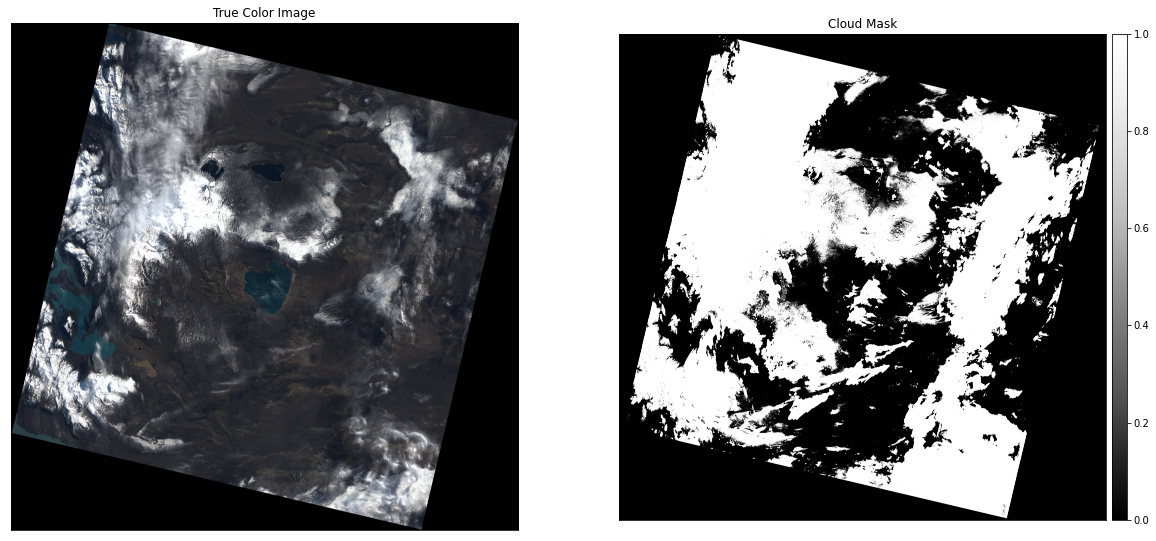

In [18]:
f, ax= plt.subplots(1,2,figsize=(20,20))
raster=rio.open(res_['raster_path'])
plot.plot_rgb(raster.read(),rgb=(2,1,0),ax=ax[0],stretch=True)
ax[0].set_title('True Color Image')
raster.close()

raster=rio.open(res_['raster_cloud_path'])
plot.plot_bands(raster.read(),ax=ax[1])
ax[1].set_title('Cloud Mask')
raster.close()

In [19]:
# now use bbox
bbox=gpd.read_file('./data/cardiel-lake.geojson')
# and do not write anything
product_id= "LC08_L1TP_230094_20210904_20210904_01_RT"

res_bbox=lp.execute(product_id,
               bbox=bbox,
               folder_proc_=PROD_INT_DIR,
               raster_return_open=True,
               write_file=None)

2021-11-23 10:14:57,028 - eo_forge_test - INFO - Processing on ./products-int/images-raw/LC08_L1TP_230094_20210904_20210904_01_RT dir
2021-11-23 10:14:57,031 - eo_forge_test - INFO - Using clipping flag: True
2021-11-23 10:14:57,031 - eo_forge_test - INFO - PROCESSING band: B2
2021-11-23 10:14:57,035 - eo_forge_test - INFO - resample: False - scale factor 1 - true pixel 30.0
2021-11-23 10:14:57,095 - eo_forge_test - INFO - checking  ROI
2021-11-23 10:14:57,123 - eo_forge_test - INFO - checking roi match - full match: True - area: 1
2021-11-23 10:14:57,123 - eo_forge_test - INFO - clipping with Tight BBox
2021-11-23 10:14:57,268 - eo_forge_test - INFO - calibrating band B2
2021-11-23 10:14:57,339 - eo_forge_test - INFO - reprojecting band B2
2021-11-23 10:14:57,599 - eo_forge_test - INFO - PROCESSING band: B3
2021-11-23 10:14:57,601 - eo_forge_test - INFO - resample: False - scale factor 1 - true pixel 30.0
2021-11-23 10:14:57,612 - eo_forge_test - INFO - checking  ROI
2021-11-23 10:14:

Text(0.5, 1.0, 'Cloud Mask')

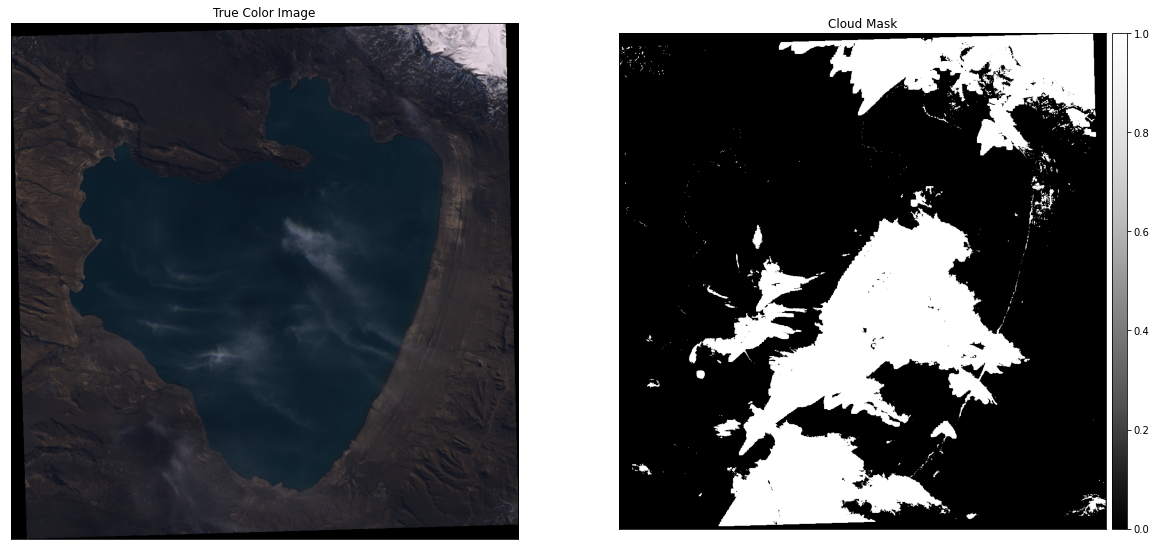

In [20]:
f, ax= plt.subplots(1,2,figsize=(20,20))
raster=res_bbox['raster']
plot.plot_rgb(raster.read(),rgb=(2,1,0),ax=ax[0])
ax[0].set_title('True Color Image')

raster=res_bbox['raster_cloud']
plot.plot_bands(raster.read(),ax=ax[1])
ax[1].set_title('Cloud Mask')


### Partial Match

In [21]:
# now use abbox
bbox=gpd.read_file('./data/cardiel-lake-partial-L8.geojson')
# and do not write anything
product_id= "LC08_L1TP_230094_20210904_20210904_01_RT"

res_bbox=lp.execute(product_id,
               bbox=bbox,
               folder_proc_=PROD_INT_DIR,
               raster_return_open=True,
               write_file=None)

2021-11-23 10:15:50,192 - eo_forge_test - INFO - Processing on ./products-int/images-raw/LC08_L1TP_230094_20210904_20210904_01_RT dir
2021-11-23 10:15:50,195 - eo_forge_test - INFO - Using clipping flag: True
2021-11-23 10:15:50,195 - eo_forge_test - INFO - PROCESSING band: B2
2021-11-23 10:15:50,199 - eo_forge_test - INFO - resample: False - scale factor 1 - true pixel 30.0
2021-11-23 10:15:50,212 - eo_forge_test - INFO - checking  ROI
2021-11-23 10:15:50,215 - eo_forge_test - INFO - checking roi match - full match: False - area: 0.8540431286563016
2021-11-23 10:15:50,215 - eo_forge_test - INFO - clipping with Tight BBox
2021-11-23 10:15:50,882 - eo_forge_test - INFO - reprojecting raster to BBox - Not Full Match Case
2021-11-23 10:15:51,560 - eo_forge_test - INFO - calibrating band B2
2021-11-23 10:15:52,127 - eo_forge_test - INFO - reprojecting band B2
2021-11-23 10:15:54,247 - eo_forge_test - INFO - PROCESSING band: B3
2021-11-23 10:15:54,249 - eo_forge_test - INFO - resample: Fals

Text(0.5, 1.0, 'Cloud Mask')

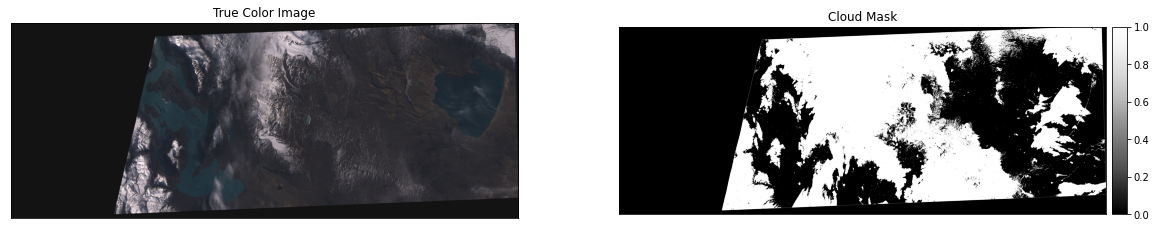

In [22]:
f, ax= plt.subplots(1,2,figsize=(20,20))
raster=res_bbox['raster']
plot.plot_rgb(raster.read(),rgb=(2,1,0),ax=ax[0])
ax[0].set_title('True Color Image')

raster=res_bbox['raster_cloud']
plot.plot_bands(raster.read(),ax=ax[1])
ax[1].set_title('Cloud Mask')


## Sentinel2  Image

### No bbox

We will query and calibrate the whole image and we will return it as a file (not in memory).

__NOTE__: Image Raw _S2A_MSIL1C_20210810T141741_N0301_R010_T19FCF_20210810T193059.SAFE_ or with the same TILE should exist on IMAGES_RAW dir.

In [23]:
# Init Loader and query bands
SENTINEL2_BANDS=["B02","B03","B04","B08","B11"]
lp=Sentinel2Loader(IMAGES_RAW,bands=SENTINEL2_BANDS,resolution=10,logger=logger)

2021-11-23 10:16:43,485 - eo_forge_test - INFO - Running on Sentinel 2 data


That is, we have instantiated the Loader with:
- folder: IMAGE_RAW, the place where we look for products (see later)
- bands: list of bands that we require to be processed
- resolution: pick 10 meters (default @ 20 meters)

And now call the processor for the requested product-id:

In [24]:
product_id= "S2A_MSIL1C_20210810T141741_N0301_R010_T19FCF_20210810T193059.SAFE"
res_=lp.execute(product_id,
               bbox=None,
               folder_proc_=PROD_INT_DIR,
               raster_return_open=False,
               write_file='_complete')

2021-11-23 10:16:48,610 - eo_forge_test - INFO - Processing on ./products-int/images-raw/S2A_MSIL1C_20210810T141741_N0301_R010_T19FCF_20210810T193059.SAFE dir
2021-11-23 10:16:48,685 - eo_forge_test - INFO - Using clipping flag: False
2021-11-23 10:16:48,687 - eo_forge_test - INFO - PROCESSING band: B02
2021-11-23 10:16:48,826 - eo_forge_test - INFO - resample: False - scale factor 1 - true pixel 10.0
2021-11-23 10:16:48,827 - eo_forge_test - INFO - no bbox - full match: True - area: 1
2021-11-23 10:16:55,199 - eo_forge_test - INFO - calibrating band B02
2021-11-23 10:16:55,973 - eo_forge_test - INFO - reprojecting band B02
2021-11-23 10:16:57,138 - eo_forge_test - INFO - PROCESSING band: B03
2021-11-23 10:16:57,218 - eo_forge_test - INFO - resample: False - scale factor 1 - true pixel 10.0
2021-11-23 10:16:57,219 - eo_forge_test - INFO - no bbox - full match: True - area: 1
2021-11-23 10:17:04,581 - eo_forge_test - INFO - calibrating band B03
2021-11-23 10:17:05,846 - eo_forge_test - 

In [25]:
#check res_
res_

{'raster': None,
 'raster_cloud': None,
 'match': 'TOTAL',
 'raster_path': './products-int/images-crop/S2A_MSIL1C_20210810T141741_N0301_R010_T19FCF_20210810T193059_complete.TIF',
 'raster_cloud_path': './products-int/images-crop/S2A_MSIL1C_20210810T141741_N0301_R010_T19FCF_20210810T193059_CLOUDS_complete.TIF'}

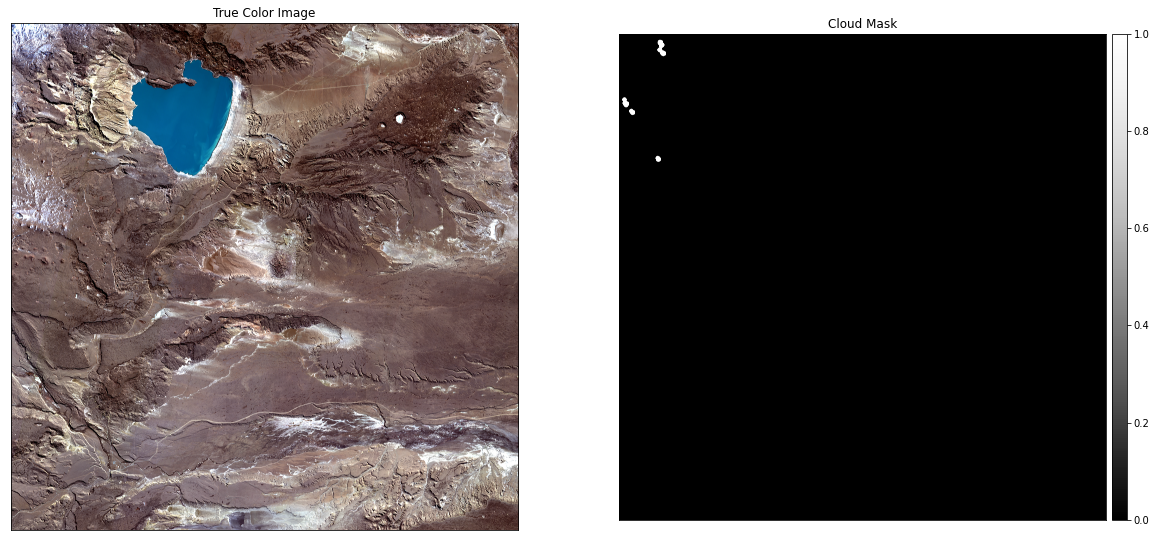

In [26]:
f, ax= plt.subplots(1,2,figsize=(20,20))
raster=rio.open(res_['raster_path'])
plot.plot_rgb(raster.read(),rgb=(2,1,0),ax=ax[0],stretch=True)
ax[0].set_title('True Color Image')
raster.close()

raster=rio.open(res_['raster_cloud_path'])
plot.plot_bands(raster.read(),ax=ax[1])
ax[1].set_title('Cloud Mask')
raster.close()

In [27]:
# now use bbox
bbox=gpd.read_file('./data/cardiel-lake.geojson')
# and do not write anything
product_id= "S2A_MSIL1C_20210810T141741_N0301_R010_T19FCF_20210810T193059.SAFE"

res_bbox=lp.execute(product_id,
               bbox=bbox,
               folder_proc_=PROD_INT_DIR,
               raster_return_open=True,
               write_file=None)

2021-11-23 10:20:21,543 - eo_forge_test - INFO - Processing on ./products-int/images-raw/S2A_MSIL1C_20210810T141741_N0301_R010_T19FCF_20210810T193059.SAFE dir
2021-11-23 10:20:21,672 - eo_forge_test - INFO - Using clipping flag: True
2021-11-23 10:20:21,674 - eo_forge_test - INFO - PROCESSING band: B02
2021-11-23 10:20:21,690 - eo_forge_test - INFO - resample: False - scale factor 1 - true pixel 10.0
2021-11-23 10:20:22,057 - eo_forge_test - INFO - checking  ROI
2021-11-23 10:20:22,122 - eo_forge_test - INFO - checking roi match - full match: True - area: 1
2021-11-23 10:20:22,124 - eo_forge_test - INFO - clipping with Tight BBox
2021-11-23 10:20:33,101 - eo_forge_test - INFO - calibrating band B02
2021-11-23 10:20:33,168 - eo_forge_test - INFO - reprojecting band B02
2021-11-23 10:20:33,252 - eo_forge_test - INFO - PROCESSING band: B03
2021-11-23 10:20:33,256 - eo_forge_test - INFO - resample: False - scale factor 1 - true pixel 10.0
2021-11-23 10:20:33,271 - eo_forge_test - INFO - ch

In [28]:
res_bbox

{'raster': <open DatasetReader name='/vsimem/a683aaaf-2b16-4d9b-9afa-ecc5a3d33f7b/a683aaaf-2b16-4d9b-9afa-ecc5a3d33f7b.tif' mode='r'>,
 'raster_cloud': <open DatasetReader name='/vsimem/cc4cea28-c40c-4aa4-9aff-4c38485d55c5/cc4cea28-c40c-4aa4-9aff-4c38485d55c5.tif' mode='r'>,
 'match': 'TOTAL',
 'raster_path': None,
 'raster_cloud_path': None}

Text(0.5, 1.0, 'Cloud Mask')

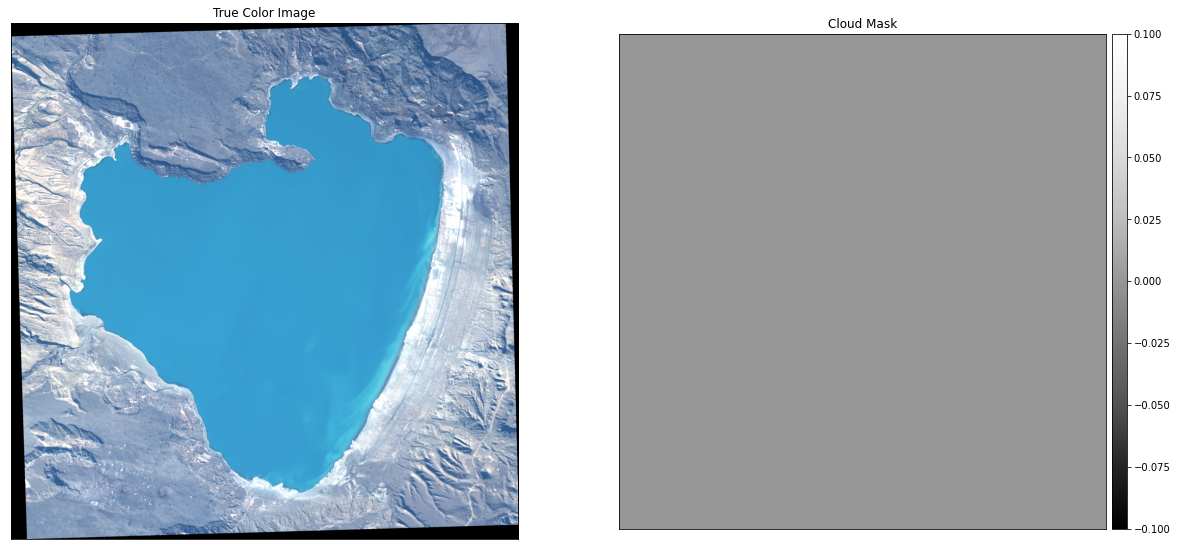

In [29]:
f, ax= plt.subplots(1,2,figsize=(20,20))
raster=res_bbox['raster']
plot.plot_rgb(raster.read(),rgb=(2,1,0),ax=ax[0],stretch=True)
ax[0].set_title('True Color Image')

raster=res_bbox['raster_cloud']
plot.plot_bands(raster.read(),ax=ax[1])
ax[1].set_title('Cloud Mask')


### Partial Match

In [30]:
# now use bbox
bbox=gpd.read_file('./data/cardiel-lake-partial-S2.geojson')
# and do not write anything
product_id= "S2A_MSIL1C_20210810T141741_N0301_R010_T19FCF_20210810T193059.SAFE"

res_bbox=lp.execute(product_id,
               bbox=bbox,
               folder_proc_=PROD_INT_DIR,
               raster_return_open=True,
               write_file=None)

2021-11-23 10:21:34,286 - eo_forge_test - INFO - Processing on ./products-int/images-raw/S2A_MSIL1C_20210810T141741_N0301_R010_T19FCF_20210810T193059.SAFE dir
2021-11-23 10:21:34,288 - eo_forge_test - INFO - Using clipping flag: True
2021-11-23 10:21:34,289 - eo_forge_test - INFO - PROCESSING band: B02
2021-11-23 10:21:34,423 - eo_forge_test - INFO - resample: False - scale factor 1 - true pixel 10.0
2021-11-23 10:21:34,443 - eo_forge_test - INFO - checking  ROI
2021-11-23 10:21:34,445 - eo_forge_test - INFO - checking roi match - full match: False - area: 0.7105503210242377
2021-11-23 10:21:34,445 - eo_forge_test - INFO - clipping with Tight BBox
2021-11-23 10:21:35,560 - eo_forge_test - INFO - reprojecting raster to BBox - Not Full Match Case
2021-11-23 10:21:36,794 - eo_forge_test - INFO - calibrating band B02
2021-11-23 10:21:36,980 - eo_forge_test - INFO - reprojecting band B02
2021-11-23 10:21:37,189 - eo_forge_test - INFO - PROCESSING band: B03
2021-11-23 10:21:37,200 - eo_forge

Text(0.5, 1.0, 'Cloud Mask')

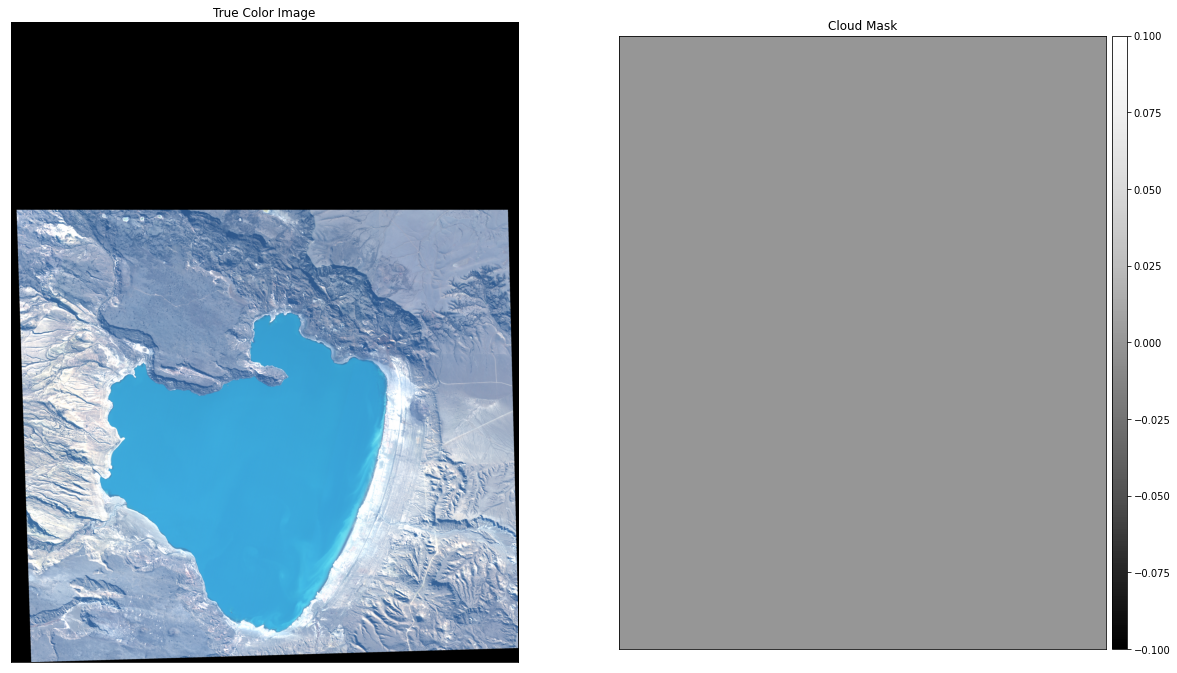

In [31]:
f, ax= plt.subplots(1,2,figsize=(20,20))
raster=res_bbox['raster']
plot.plot_rgb(raster.read(),rgb=(2,1,0),ax=ax[0],stretch=True)
ax[0].set_title('True Color Image')

raster=res_bbox['raster_cloud']
plot.plot_bands(raster.read(),ax=ax[1])
ax[1].set_title('Cloud Mask')